In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [3]:
# Sample Data
from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1500, random_state=170)

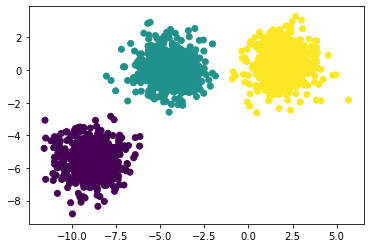

In [4]:
plt.scatter(data[:, 0], data[:, 1], c=label)

In [5]:
# K-Means
# 정확한 군집의 개수를 맞춘 경우
from sklearn.cluster import KMeans

correct_kmeans = KMeans(n_clusters=3)

In [6]:
correct_kmeans.fit(data)

KMeans(n_clusters=3)

In [7]:
correct_pred = correct_kmeans.predict(data)

In [8]:
correct_kmeans.cluster_centers_

array([[-8.94137566, -5.48137132],
       [ 1.91176144,  0.40634045],
       [-4.55490993,  0.02920864]])

In [9]:
correct_center = correct_kmeans.cluster_centers_

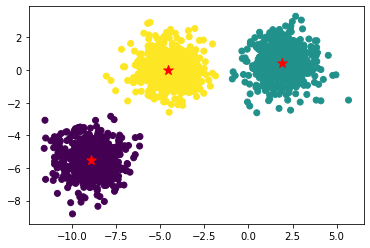

In [10]:
plt.scatter(data[:, 0], data[:, 1], c=correct_pred)
plt.scatter(correct_center[:, 0], correct_center[:, 1], marker="*", s=100, color="red")

In [11]:
# 군집의 개수를 틀린 경우
small_kmeans = KMeans(n_clusters=2)

In [12]:
small_kmeans.fit(data)

KMeans(n_clusters=2)

In [13]:
small_pred = small_kmeans.predict(data)

In [14]:
small_center = small_kmeans.cluster_centers_

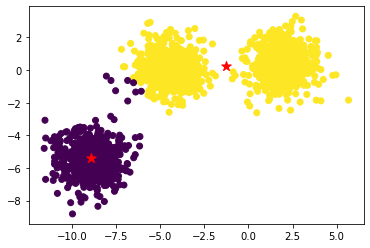

In [15]:
plt.scatter(data[:, 0], data[:, 1], c=small_pred)
plt.scatter(small_center[:, 0], small_center[:, 1], marker="*", s=100, color="red")

In [16]:
# 큰 경우
large_kmeans = KMeans(n_clusters=4)

In [17]:
large_kmeans.fit(data)

KMeans(n_clusters=4)

In [18]:
large_pred = large_kmeans.predict(data)

In [19]:
large_center = large_kmeans.cluster_centers_

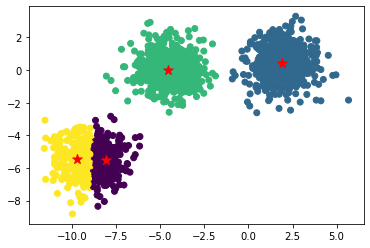

In [20]:
plt.scatter(data[:, 0], data[:, 1], c=large_pred)
plt.scatter(large_center[:, 0], large_center[:, 1], marker="*", s=100, color="red")

In [21]:
# K 찾기
sse_per_n = []

for n in range(1, 12, 2):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    sse = kmeans.inertia_
    sse_per_n += [sse]

C:\Users\sclab\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Text(0.5, 1.0, 'Sum of Sqaured Error')

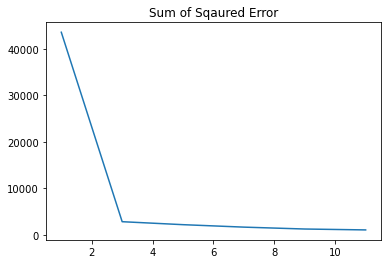

In [22]:
plt.plot(range(1, 12, 2), sse_per_n)
plt.title("Sum of Sqaured Error")

In [23]:
# K-Means 한계
# 서로 다른 크기의 군집
size_data, size_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

In [24]:
size_data = np.vstack(
    (size_data[size_label == 0][:500],
     size_data[size_label == 1][:100],
     size_data[size_label == 2][:10])
)
size_label = [0] * 500 + [1] * 100 + [2] * 10

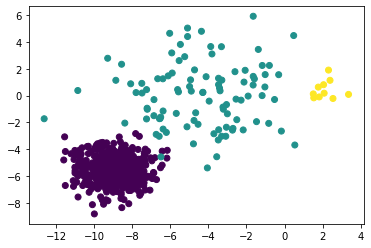

In [25]:
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_label)

In [26]:
size_kmeans = KMeans(n_clusters=3, random_state=2022)

In [27]:
size_pred = size_kmeans.fit_predict(size_data)

In [28]:
size_center = size_kmeans.cluster_centers_

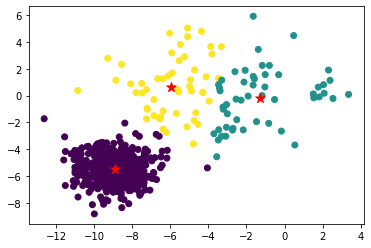

In [29]:
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_pred)
plt.scatter(size_center[:, 0], size_center[:, 1], marker="*", s=100, color="red")

In [30]:
# 서로 다른 밀도의 군집
density_data, density_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

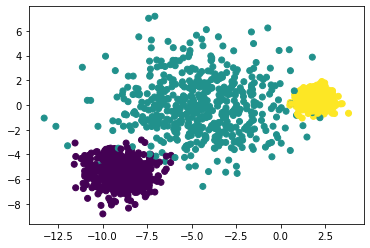

In [31]:
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_label)

In [32]:
density_kmeans = KMeans(n_clusters=3, random_state=2022)

In [33]:
density_pred = density_kmeans.fit_predict(density_data)

In [34]:
density_center = density_kmeans.cluster_centers_

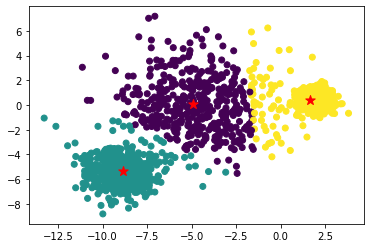

In [35]:
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_pred)
plt.scatter(density_center[:, 0], density_center[:, 1], marker="*", s=100, color="red")

In [36]:
# 지역적 패턴이 있는 군집
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
pattern_data = np.dot(data, transformation)

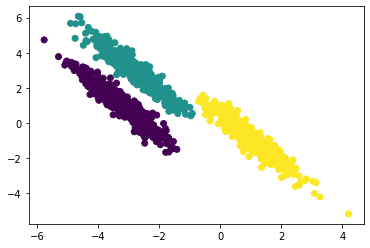

In [37]:
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=label)

In [39]:
pattern_kmeans = KMeans(n_clusters=3, random_state=2022)

In [40]:
pattern_pred = pattern_kmeans.fit_predict(pattern_data)

In [41]:
pattern_center = pattern_kmeans.cluster_centers_

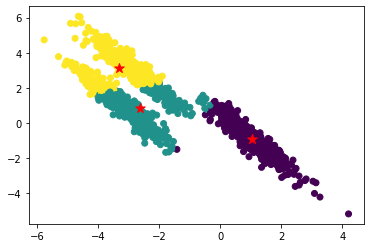

In [42]:
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_pred)
plt.scatter(pattern_center[:, 0], pattern_center[:, 1], marker="*", s=100, color="red")

In [43]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [44]:
# 서로 다른 크기의 군집
size_dbscan = DBSCAN(eps=1.0)

In [45]:
size_db_pred = size_dbscan.fit_predict(size_data)

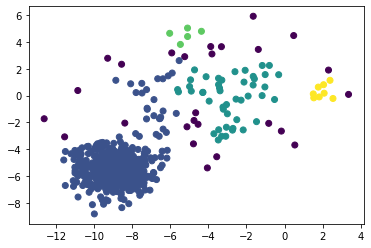

In [46]:
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_db_pred)

In [47]:
# 서로 다른 밀도의 군집
density_dbscan = DBSCAN()

In [48]:
density_db_pred = density_dbscan.fit_predict(density_data)

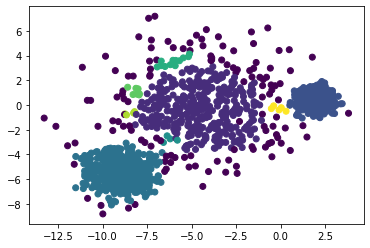

In [49]:
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_db_pred)

In [50]:
# 지역적 패턴이 있는 군집
pattern_db = DBSCAN(eps=.3, min_samples=20)

In [51]:
pattern_db_pred = pattern_db.fit_predict(pattern_data)

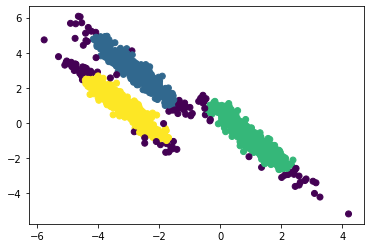

In [52]:
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_db_pred)